In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


# Dataset:
## This is from Youtube, I do not own any of this dataset this is for ***educational purposes only***

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fm3Trans', 'fAlpha', 'fDist','class']

df = pd.read_csv('./datasets/magic+gamma+telescope/magic04.data', names = cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
# check the unique values on class
df['class'].unique()

array(['g', 'h'], dtype=object)

In [4]:
# converting class into numbers

df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


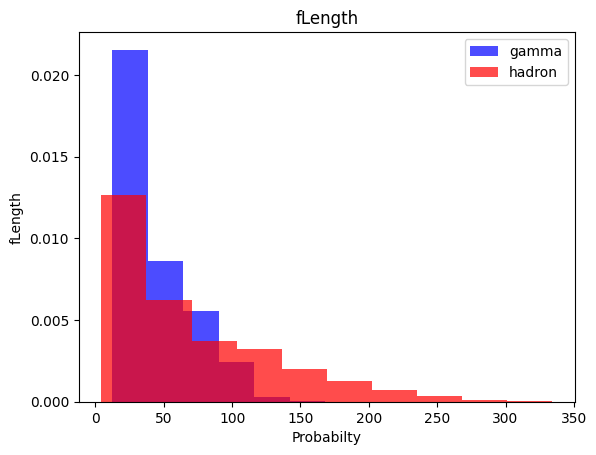

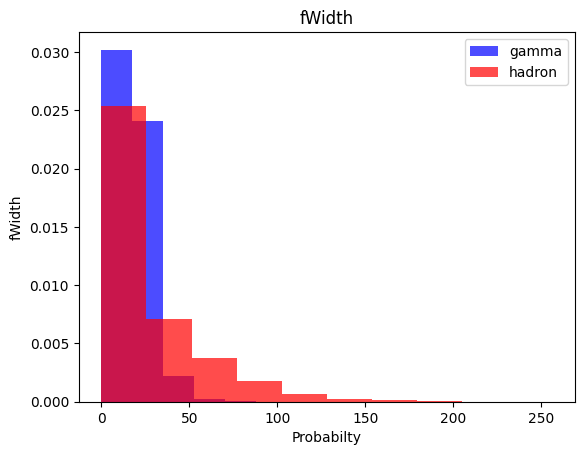

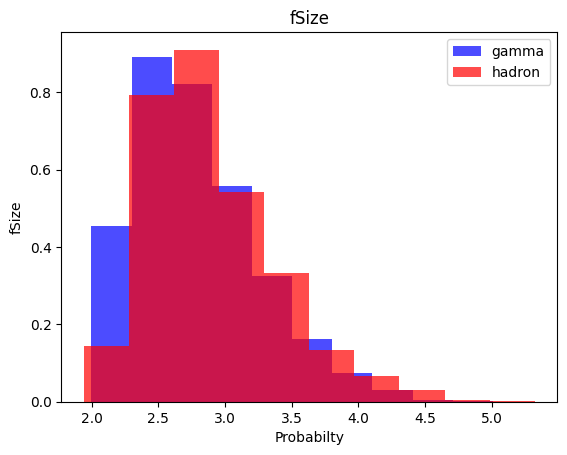

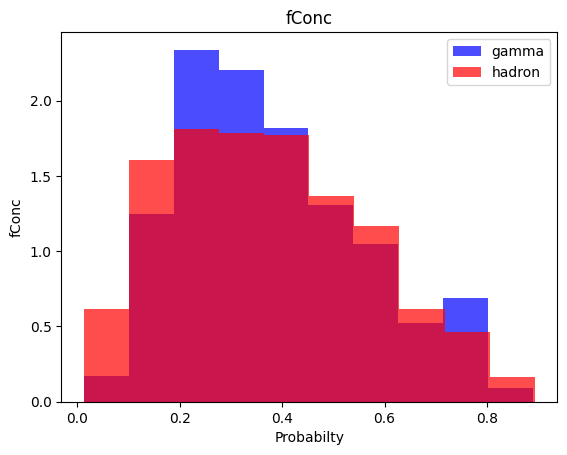

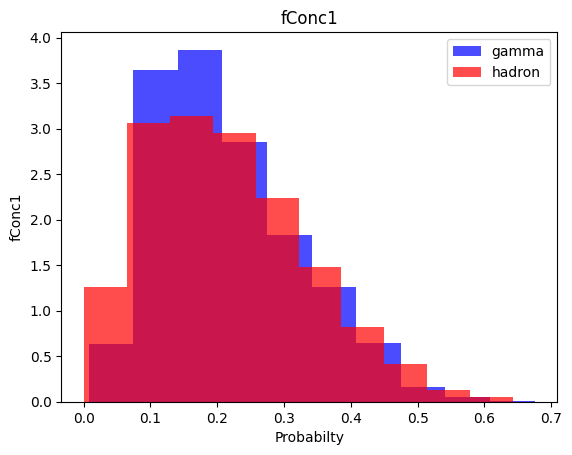

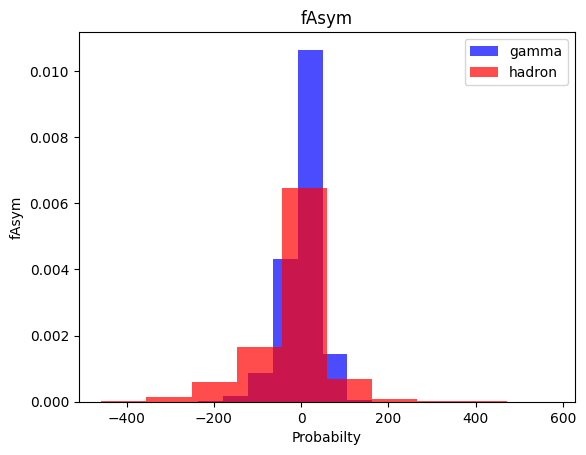

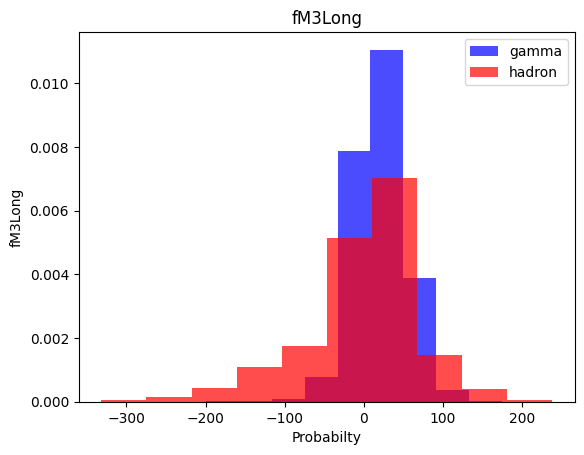

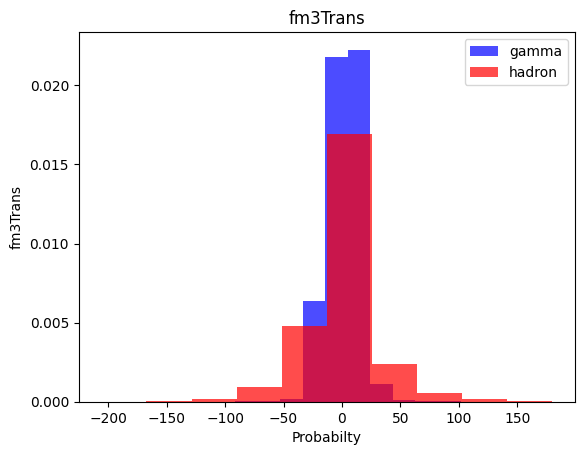

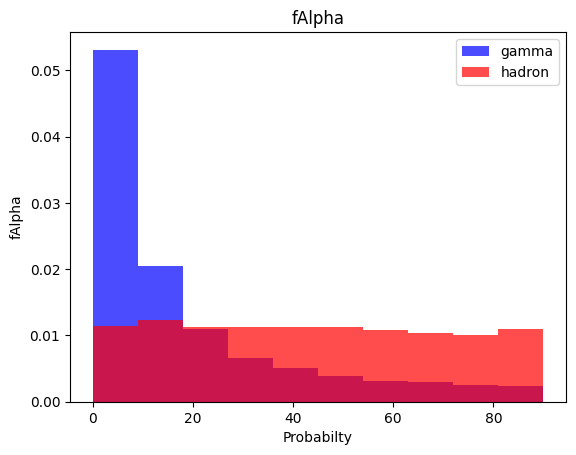

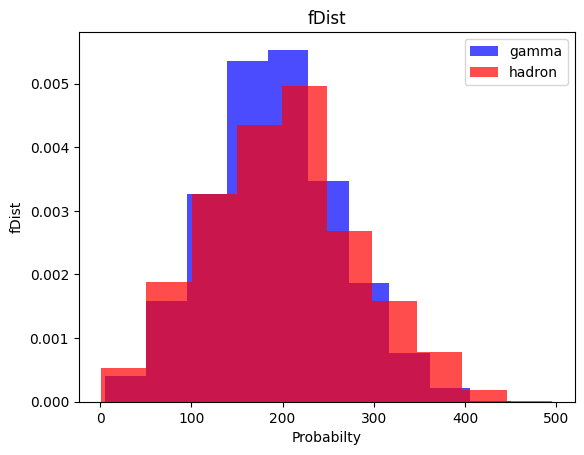

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["class"]==0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.xlabel("Probabilty")
    plt.ylabel(label)
    plt.legend()
    plt.show()

# Train, Validation, Test Datasets


In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/kalzumaki/.local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample=False):
    # X are columns from 1st to the second to the last
    X = dataframe[dataframe.columns[:-1]].values
    # y is the target column which is at the last column
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y, = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [9]:
len(y_train)

14744

here we will witness the balance between the two


In [10]:
sum(y_train == 1)

np.int64(7372)

In [11]:
sum(y_train ==0)

np.int64(7372)

In [12]:

# for not oversampling
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
y_pred = knn_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1300
           1       0.86      0.86      0.86      2504

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes


In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()

nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test) # prediction

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.52      1300
           1       0.75      0.90      0.82      2504

    accuracy                           0.74      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.74      0.71      3804

